In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from utils.plotData import plotData
from utils.mapFeature import mapFeature
from utils.costFunctionReg import costFunctionReg
from utils.plotDecisionBoundary import plotDecisionBoundary
from utils.predict import predict

Text(0, 0.5, 'Microchip Test 2')

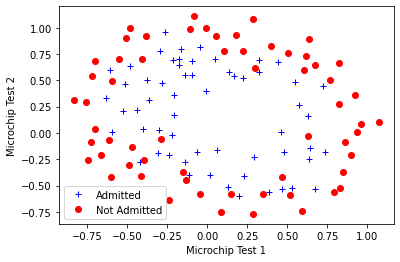

In [12]:
# Load Data
# The first two columns contains the X values and the third column contains the label (y).
data = np.loadtxt('ex2data2.txt',delimiter=",")
X = data[:,:2]
y = data[:,2]

plotData(X,y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

In [4]:
#Add Polynomial Features
X = mapFeature(X[:,0], X[:,1])
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

#Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, X, y)

print('Cost at initial theta (zeros):{:.3f}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
print(' {:.4f}\n {:.4f}\n {:.4f}\n {:.4f}\n {:.4f}'.format(*np.array(grad[0:5])))
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros):0.693
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [10]:
#Compute and display cost and gradient  with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, lamda = 10)

print('Cost at test theta (with lambda = 10):{:.3f}'.format(cost))
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:')
print(' {:.4f}\n {:.4f}\n {:.4f}\n {:.4f}\n {:.4f}'.format(*np.array(grad[0:5])))
print('Expected gradients (approx) - first five values only:');
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922')

Cost at test theta (with lambda = 10):3.165
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


/home/paradeisios/Documents/GITLAB/Coursera_Machine_Learning/week3/python/utils/mapFeature.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(out)


Text(0, 0.5, 'Microchip Test 2')

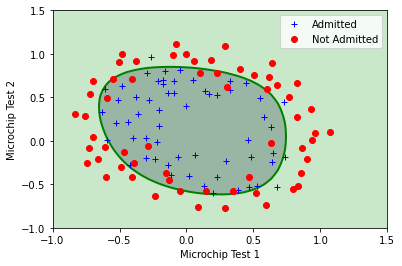

In [7]:
# ============= Part 2: Regularization and Accuracies =============
# Optimize

initial_theta = np.zeros(X.shape[1])
options= {'maxiter': 400}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)
cost = res.fun
theta = res.x

plotDecisionBoundary(theta, X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

In [8]:
# Accuracy measures 

p = predict(theta, X)
accuracy = np.mean(y==p)*100
print('Train Accuracy: {:.1f}%'.format(accuracy))
print('Expected accuracy (approx): 83.1')

Train Accuracy: 83.1%
Expected accuracy (approx): 83.1


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns;sns.set()

data = np.loadtxt('ex2data1.txt', delimiter=",")
X = data[:,0:2]
y = data[:,2]

poly = PolynomialFeatures()
logreg  = LogisticRegression()
pipe = Pipeline([("poly",poly),
                 ("logreg",logreg)])

param_grid = {
    "poly__degree": np.arange(10),
    "logreg__C": np.linspace(-100, 100)
}

grid = GridSearchCV(pipe,param_grid,n_jobs=10,)
grid.fit(X,y)

grid.best_params_

{'logreg__C': 2.040816326530617, 'poly__degree': 2}

Accuracy Score: 0.88


<AxesSubplot:>

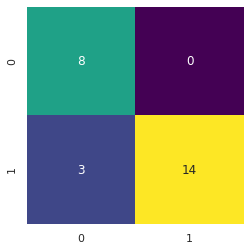

In [10]:
poly = PolynomialFeatures(grid.best_params_['poly__degree'])
poly.fit(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=420)

model = LogisticRegression(C=grid.best_params_["logreg__C"])
model.fit(X_train,y_train)

prediction = model.predict(X_test)
acc = accuracy_score(y_test,prediction)
mat=confusion_matrix(y_test,prediction)

print(f"Accuracy Score: {acc}")
sns.heatmap(mat,square=True, annot=True, cbar=False,cmap="viridis")